In [2]:
from sympy import MatrixSymbol, Matrix, Identity

import sympy as sym
import pandas as pd
import math

sym.init_printing()
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import control
import random

# IDENTIFICACIÓN DE SISTEMAS

Profesor: Jairo Alberto Cuéllar Guarnizo  
Programa: Ingeniería en Automatización y Control

## Sistemas de segundo orden

Un sistema de segundo orden es aquel que en su modelo analítico en tiempo continuo, involucra por lo menos una segunda derivada de la variable de interés. Los parámetros a tener en cuenta para la identificación son: La frecuencia natural del sistema ($w_n$), el coeficiente de amortiguamiento ($\zeta$).

$$G(s)=K\frac{w_n^2}{s^2 + 2 \zeta w_n s + w_n^2}$$

Se debe recordar que el tiempo de establecimiento del sistema, el tiempo del pico y el sobrepaso máximo están relacionados con la frecuencia natural y con el índice de amortiguamiento.

$$Mp = 100\frac{x_{max} - x_{ss}}{x_{ss}}$$

$$Mp = 100 e^{-\frac{\pi \zeta}{\sqrt{1-\zeta^2}}}$$

De la segunda expresión se podría despejar el coeficiente de amortiguamiento así:

$$\zeta = \frac{-ln\left(\frac{Mp}{100}\right)}{\sqrt{\pi^2+ln\left(\frac{Mp}{100}\right)^2}}$$

Es claro que el valor de sobreimpulso ocurre en un tiempo del pico, así:

$$t_p = \frac{\pi}{w_n\sqrt{1-\zeta^2}}$$


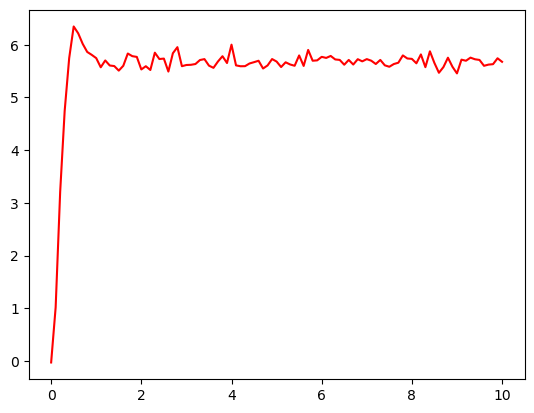

In [3]:
## Respuesta típica de un sistema de segundo orden con ruido
## Simulando el experimento de medición
## Definir valores originales y necesarios para la simulación:
K = np.random.rand()*8
wn = np.random.rand()*8
#K = 8
#wn = 8

z = np.random.rand()
z = 0.6

tf = 10
dt = 0.1
t = np.linspace(0,tf,int(tf/dt)+1)

g = control.tf([K*wn*wn],[1,2*z*wn,wn*wn])
_,y = control.step_response(g,t)
N = len(t)
## Ruido para simular la señal de salida capturada "yn"
r = 0.1
e = np.random.normal(0,r,size=N)
yn = y+e
plt.plot(t,yn,color = 'red')

wn, z

## Experimento de identificación

**Paso 1:** Determinar el porcentaje de sobrepaso para para calcular el índice de amortiguamiento del sistema. En este caso se debe "observar" el valor final de establecimiento del sistema.

In [4]:
## El porcentaje de sobrepaso (overshot) y el tiempo del pico

## Valor observado de la gráfica de la respuesta.
Kf = 5.2
############

###### Valor máximo alcanzado por la respuesta y Valor del sobrepaso
Kmax = np.max(yn)
os = ((Kmax - Kf)/Kf)
############

## Calculando el tiempo de pico
for i in range(len(yn)):
    if(yn[i]==Kmax):
        tp = t[i]
        break
os, tp

**Paso 2:** Calcular el valor aproximado de zeta ($\zeta$) para el sistema.

In [5]:
## Determinando el índice de amortiguamiento
pi = math.pi
ze = -math.log(os)/math.sqrt(pi*pi+math.log(os)*math.log(os))
ze

**Paso 3:** Calculando la frecuencia natural del sistema

In [6]:
## Determinando el valor de wn a partir del tp y de zeta
we = pi/(tp*math.sqrt(1-ze*ze))
we

In [7]:
## Calculando el tiempo de establecimiento y 
## determinando el valor aproximado del valor final
ts = 4/(ze*we)
ts

## Actualizando el valor final utilizando el tiempo de establecimiento
Kf = 0
i2 = 0;
for j in range(N):
    if(t[j]>ts):
        Kf = Kf+yn[j]
        i2 = i2+1

Kf = Kf/i2
print(Kf)

5.677328440829321


**Paso 4:** Armando la función de transferencia de segundo orden.

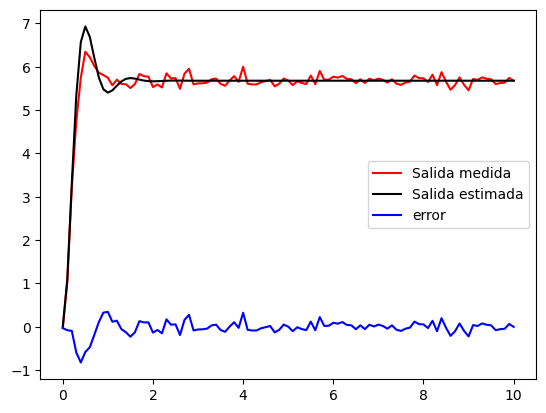

In [8]:
## Armando la función de transferencia aproximada:
ge = control.tf([Kf*we*we],[1,2*ze*we,we*we])
_,ye = control.step_response(ge,t)
e = yn - ye
plt.plot(t,yn,color = 'red')
plt.plot(t,ye,color = 'black')
plt.plot(t,e,color = 'blue')
plt.legend(['Salida medida','Salida estimada','error'])


In [9]:
## Función de transferencia estimada o identificada
ge

TransferFunction(array([276.07019698]), array([ 1.        ,  6.04925175, 48.62677928]))

In [10]:
## Función de transferencia original
g

TransferFunction(array([292.13152821]), array([ 1.        ,  8.60962908, 51.47618945]))